<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209  

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,331.000000
mean,1100.063253,2.144578,0.382530,30.272590,0.481928,0.397590,40.982087
std,122.763173,0.846283,0.486739,14.181209,0.874084,0.810651,61.228558
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,992.750000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,1099.500000,2.000000,0.000000,27.000000,0.000000,0.000000,16.000000
75%,1210.250000,3.000000,1.000000,39.000000,1.000000,1.000000,40.633350
max,1307.000000,3.000000,1.000000,76.000000,8.000000,6.000000,512.329200


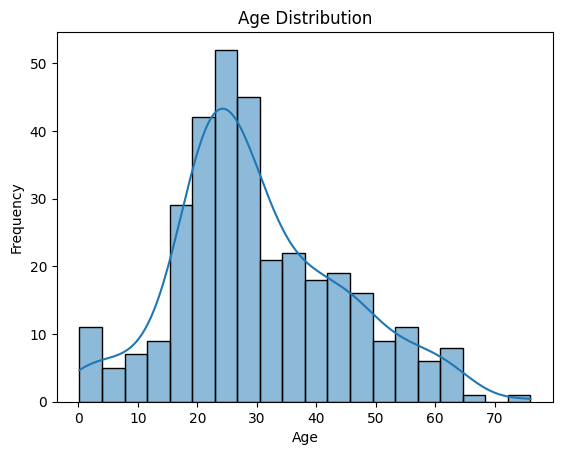

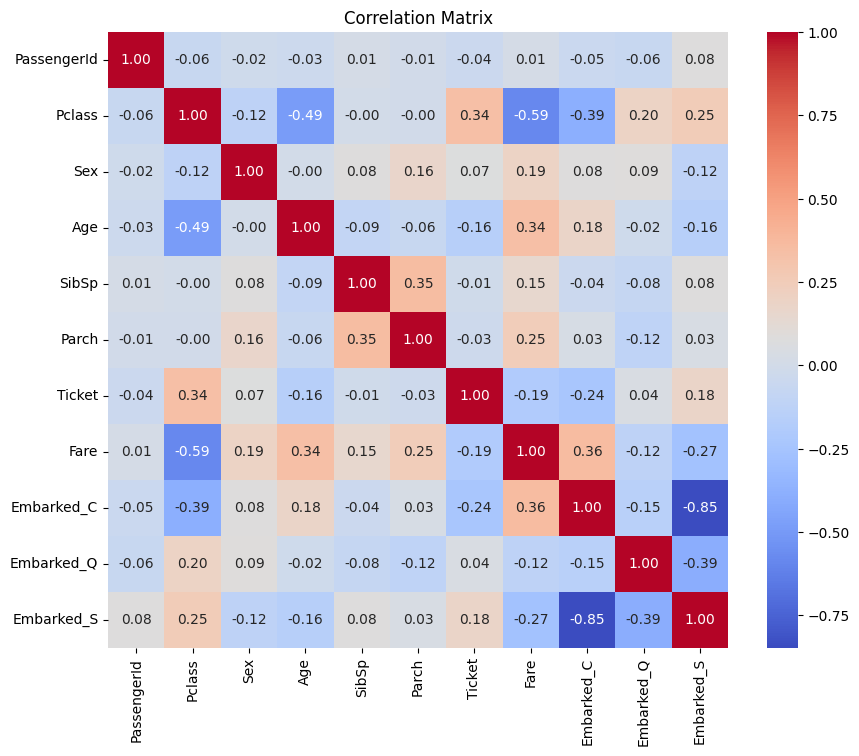

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/test.csv')
print(df.info())
print(df.describe())
df.dropna(subset=['Age'], inplace=True)
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'])
display(df.describe())
if 'Age' in df.columns:
    sns.histplot(df['Age'], bins=20, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
if 'Survived' in df.columns and 'Sex' in df.columns:
    sns.countplot(x='Survived', hue='Sex', data=df)
    plt.title('Survival by Sex')
    plt.xlabel('Survived')
    plt.ylabel('Count')
    plt.legend(['Male', 'Female'])
    plt.show()
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna(axis=1, how='all')
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
df.to_csv('/content/sample_data/sorted_data.csv', index=False)
